In [13]:
%matplotlib inline
data = np.genfromtxt('Rb_repump_full_range.csv', delimiter=',',
                     skip_header=22, unpack=True)

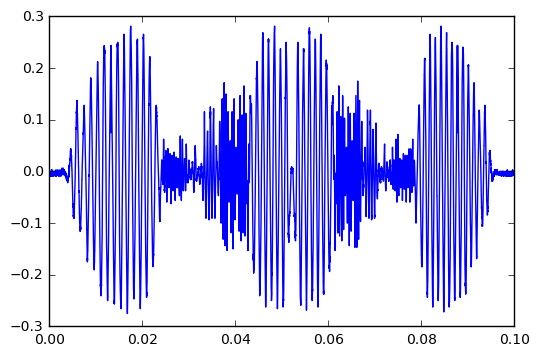

In [14]:
plot(data[1], data[2])

In [15]:
line = 377.107463e12
crossover=266.65e6/2
absolute_ref = line - 2.563005e9 - 73e6 + crossover

hf_split = 6.834682e9
laser_offset = hf_split - crossover # Hz
rf = 7.5e9

print(laser_offset)

6701357000.0


In [16]:
# lock points read manually from the plot.
# Third peak next to the spike at the lock point of 0.204V
lp_right=0.08407
center=0.0522
lp_left=0.01765

x_factor = laser_offset / (lp_right-center) # Hz / s

x = (data[1]-lp_right)*x_factor

error translation 2.157118e+08 Hz/V


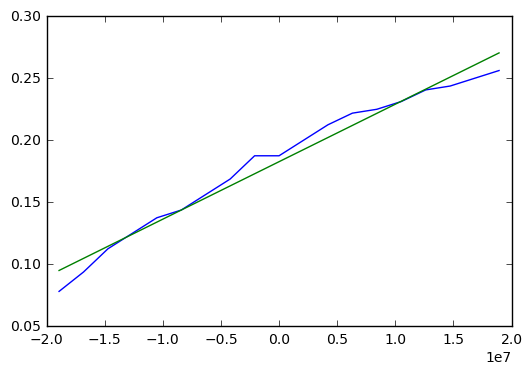

In [17]:
analysis_range = 2e7
idx = np.argwhere(np.logical_and(x > -analysis_range, x < analysis_range)).flatten()
a,c = np.polyfit(x[idx], data[2][idx], 1)
# a [V/Hz]
y_factor = 1/a
print("error translation %e Hz/V"%y_factor)
y = (data[2])*y_factor
plot(x[idx], data[2][idx])
plot(x[idx], np.poly1d((a,c))(x[idx]))

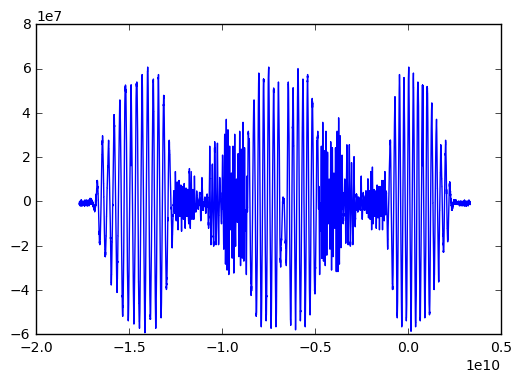

In [24]:
plot(x, y)
np.savetxt('Rb_repump_full_range_converted.csv', np.vstack((x+laser_offset,data[2])).T[::5], delimiter=',')

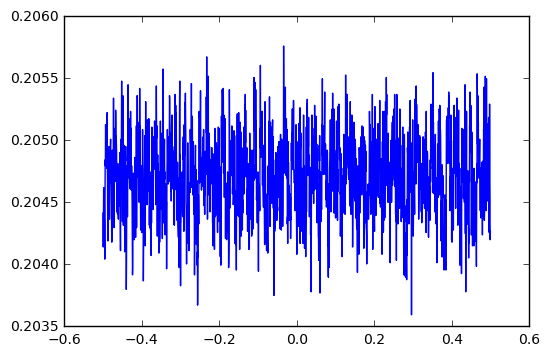

In [19]:
noise_data = np.genfromtxt('lock_signal_0.01_lock_in.csv', delimiter=',',
                           skip_h
                           eader=23, unpack=True)
plot(noise_data[1], noise_data[2])

maximal amplitude 467656.305521 Hz


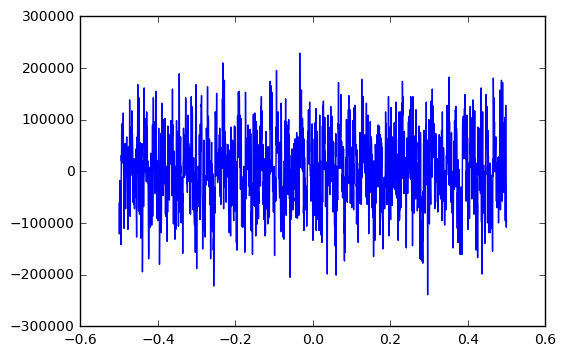

In [22]:
lockpoint = 0.2047 # V
plot(noise_data[1], (noise_data[2]-lockpoint)*y_factor)

ampl = (max(noise_data[2]) - min(noise_data[2]))*y_factor
print('maximal amplitude %f Hz'%ampl)

(array([   7.,   34.,  113.,  294.,  481.,  509.,  347.,  155.,   55.,    5.]),
 array([ 0.20359375,  0.20381055,  0.20402735,  0.20424414,  0.20446094,
         0.20467774,  0.20489453,  0.20511133,  0.20532813,  0.20554492,
         0.20576172]),
 <a list of 10 Patch objects>)

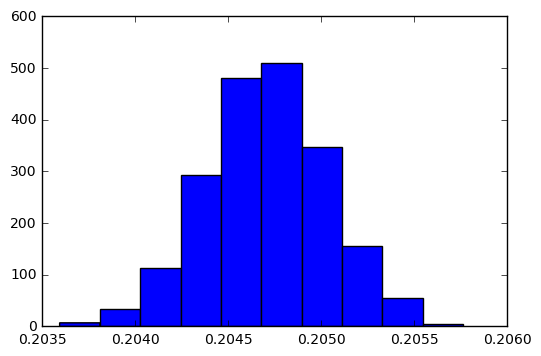

In [21]:
hist(noise_data[2])